In [ ]:
!pip install --q pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

import pingouin as pg

In [ ]:
df_diamonds = sns.load_dataset("diamonds")

In [ ]:
df_diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


carat: The weight of the diamond, equivalent to 200mg (should be a good indicator)

cut: Quality of the cut

color: Color of the diamond from J to D (worst to best)

clarity: How clear the diamond is; I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

depth: Total depth percentage (relative to x and y). Will likely be collinear.

table: Width of top of diamond relative to widest point (43--95)

price: In US dollars ($)

x, y, z: Dimensions of the diamond

In [ ]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
df_diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df_diamonds.describe(include = "all")

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


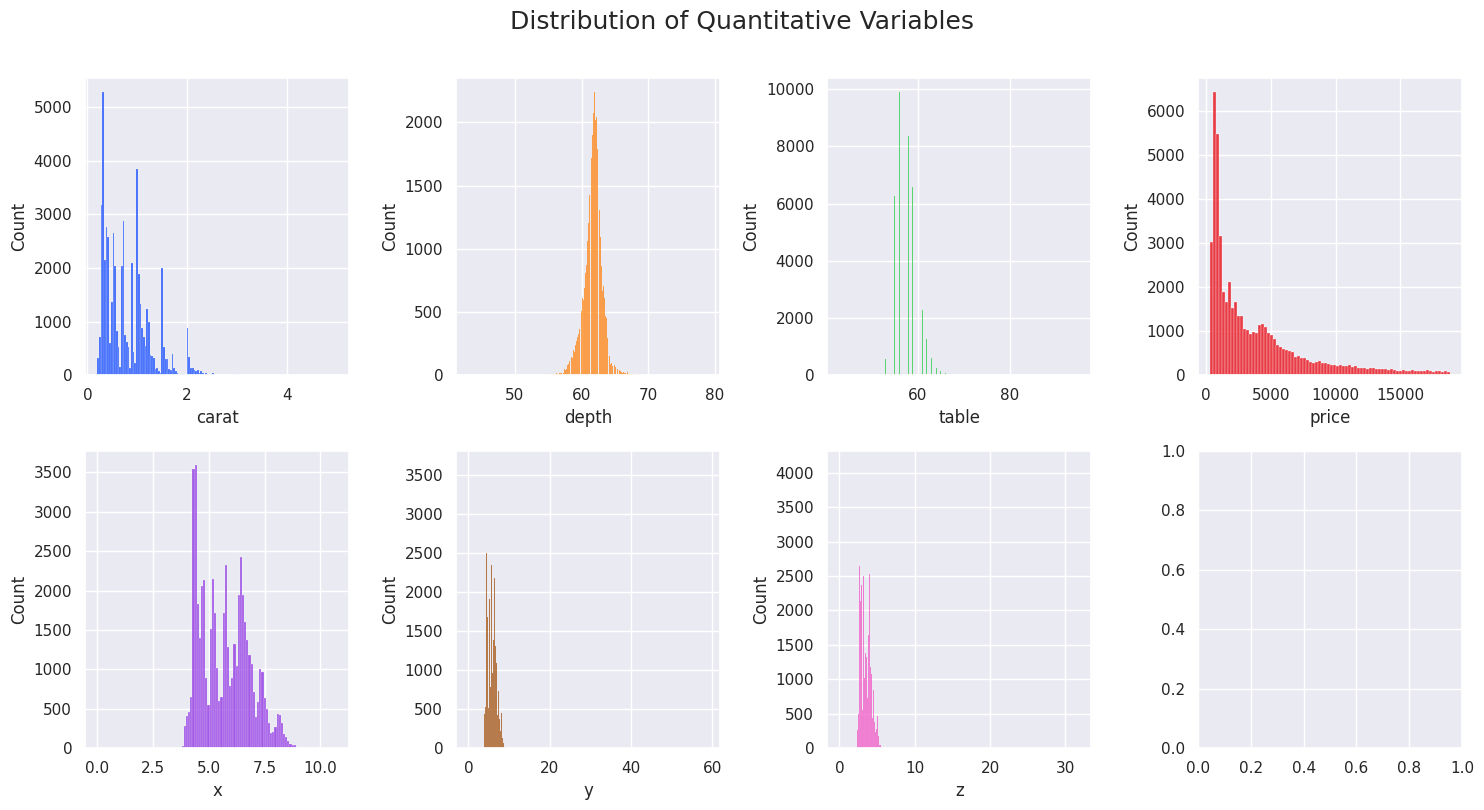

In [ ]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig , axes = plt.subplots(2, 4, figsize = (15,8))

sns.histplot(df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.histplot(df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.histplot(df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.histplot(df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.histplot(df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.histplot(df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.histplot(df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Distribution of Quantitative Variables", y = 1.01, size = 18)
plt.tight_layout()
plt.show()

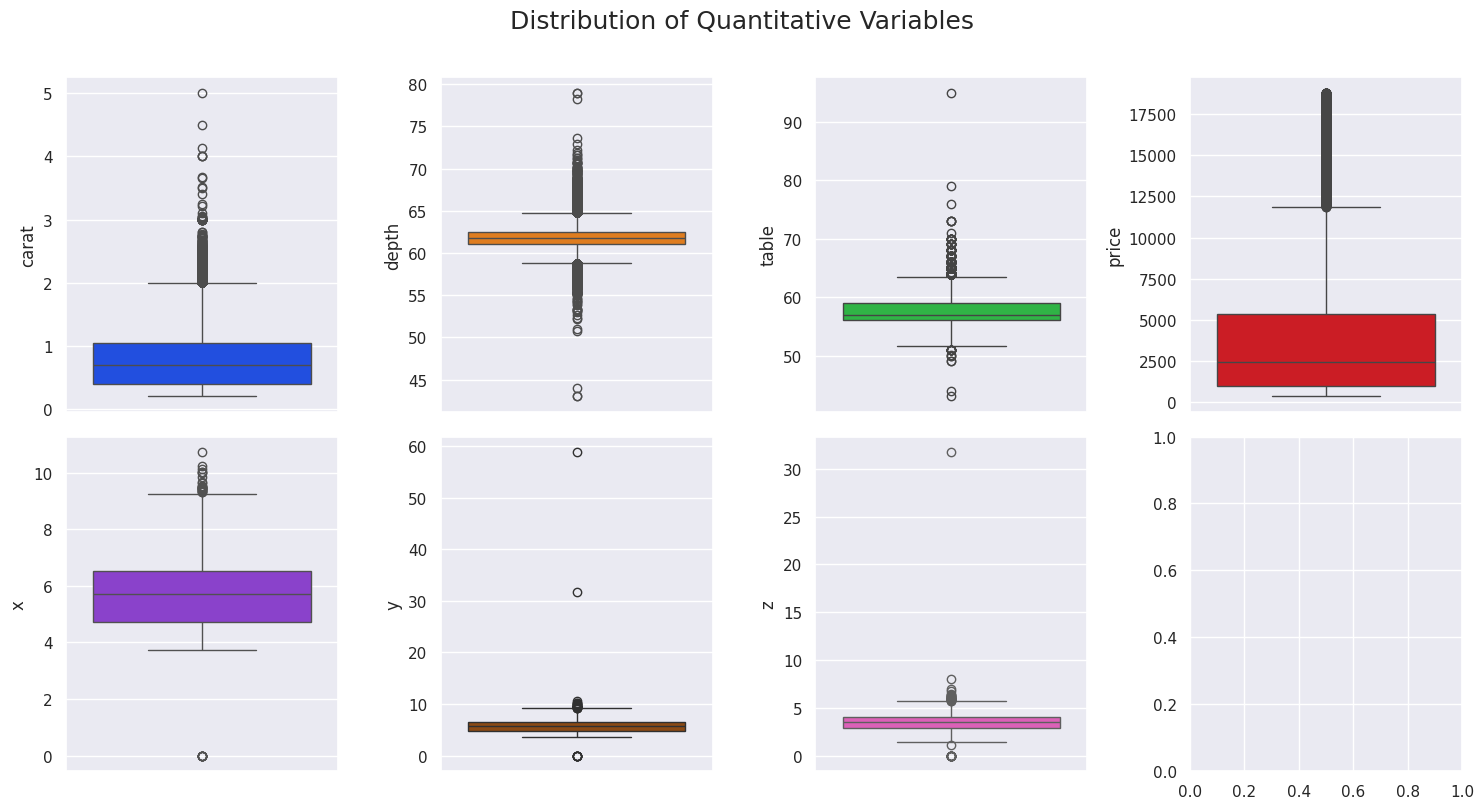

In [ ]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig , axes = plt.subplots(2, 4, figsize = (15,8))

sns.boxplot(df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.boxplot(df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.boxplot(df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.boxplot(df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.boxplot(df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Distribution of Quantitative Variables", y = 1.01, size = 18)
plt.tight_layout()
plt.show()

In [ ]:
weird_zeros = df_diamonds[(df_diamonds["x"] == 0) & (df_diamonds["y"] == 0) & (df_diamonds["z"] == 0)]
weird_zeros

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [ ]:
weird_zeros2 = df_diamonds[(df_diamonds["x"] == 0) | (df_diamonds["y"] == 0) | (df_diamonds["z"] == 0)]
weird_zeros2

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
weird_zeros["carat"].count()

7

In [ ]:
weird_zeros.shape

(7, 10)

In [ ]:
df_diamondsX = df_diamonds.copy()
df_diamondsX

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df_diamondsX = df_diamondsX[~df_diamondsX.isin(weird_zeros)].dropna(how = "all")
df_diamondsX

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
df_diamondsX.shape

(53933, 10)

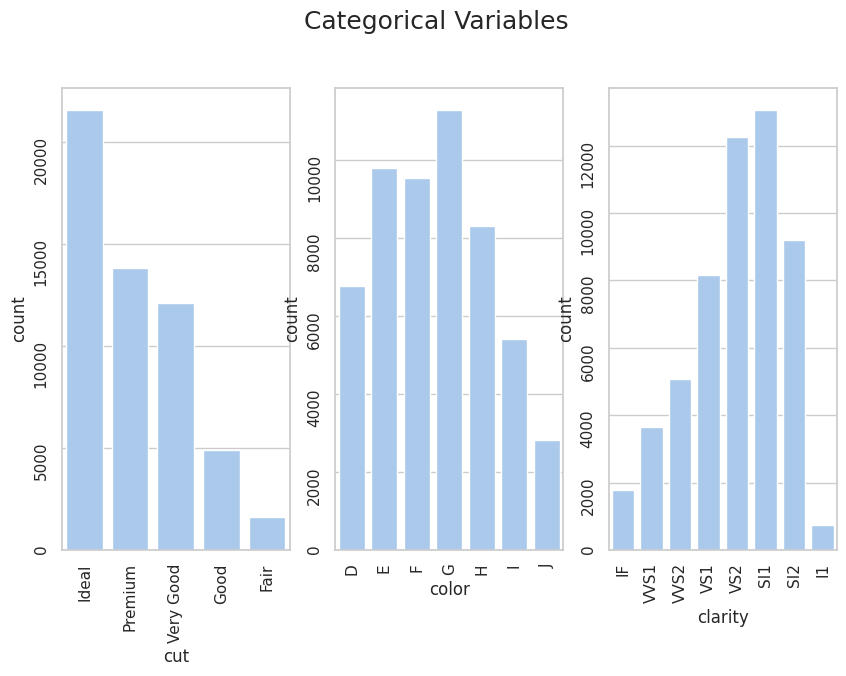

In [ ]:
#sns.set(color_codes=True)

sns.set_theme(style="whitegrid", palette="pastel")
colors = sns.color_palette("bright")

fig, axes = plt.subplots(1, 3, figsize = (10,6))

sns.countplot(x="cut", data = df_diamondsX, ax = axes[0])
sns.countplot(x="color", data = df_diamondsX, ax = axes[1])
sns.countplot(x="clarity", data = df_diamondsX, ax = axes[2])

#quick for loop to adjust all axes at once
for ax in fig.axes:
  ax.tick_params(labelrotation=90)

plt.suptitle("Categorical Variables", y= 1.01, size = 18)
#plt.tight_layout()
plt.show()

In [ ]:
new_cols = pd.get_dummies(df_diamondsX["cut"]).copy()
new_cols.head()

,Ideal,Premium,Very Good,Good,Fair
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,False,True,False
3,False,True,False,False,False
4,False,False,False,True,False


In [ ]:
df_diamondsX2 = df_diamondsX.drop(["color","clarity","cut"], axis = 1)

In [ ]:
df_diamondsX2

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
df = pd.concat([df_diamondsX2, new_cols], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53933 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53933 non-null  float64
 1   depth      53933 non-null  float64
 2   table      53933 non-null  float64
 3   price      53933 non-null  float64
 4   x          53933 non-null  float64
 5   y          53933 non-null  float64
 6   z          53933 non-null  float64
 7   Ideal      53933 non-null  bool   
 8   Premium    53933 non-null  bool   
 9   Very Good  53933 non-null  bool   
 10  Good       53933 non-null  bool   
 11  Fair       53933 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 3.5 MB


In [ ]:
df

,carat,depth,table,price,x,y,z,Ideal,Premium,Very Good,Good,Fair
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,True,False,False,False,False
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,False,True,False,False,False
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,False,False,False,True,False
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,False,True,False,False,False
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,True,False,False,False,False
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,False,False,False,True,False
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,False,False,True,False,False
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74,False,True,False,False,False


In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 32)

In [ ]:
Y_test = test_df["price"]

X_test = test_df.drop(columns = ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns = ["price"], axis = 1)

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 32)

Y_test = test_df["price"]

X_test = test_df.drop(columns = ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns = ["price"], axis = 1)

def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

In [ ]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(linear_regression.intercept_)

12670.82701040742


In [ ]:
print(linear_regression.coef_)

[ 1.07830966e+04 -1.31732963e+02 -4.05456384e+01 -1.25563064e+03
  1.95356438e+01 -1.99064133e+01  4.89501518e+02  2.11333739e+02
  2.83889755e+02 -3.06161952e-01 -9.84418850e+02]


In [ ]:
Y_pred_linear = linear_regression.predict(X_test)

In [ ]:
Y_pred_linear

array([ 1076.44782691,   792.03346519,   599.41310921, ...,
        1514.51051063,  9651.77291093, 10655.26338978])

In [ ]:
linear_comparison = pd.DataFrame({"Actual":Y_test, "Predicted":Y_pred_linear})

In [ ]:
error_metrics(Y_test, Y_pred_linear)

('Mean Absolute Error: 872.6106187617874',
 'Mean Square Error: 2111445.262545235',
 'r2 score: 0.8663574060860503')

In [ ]:
linear_comparison["Diff"] = np.abs(linear_comparison["Actual"] - linear_comparison["Predicted"])

In [ ]:
linear_comparison.head(15)

,Actual,Predicted,Diff
35677,910.0,1076.447827,166.447827
31078,752.0,792.033465,40.033465
13719,603.0,599.413109,3.586891
33759,840.0,753.492191,86.507809
1468,2982.0,3262.267563,280.267563
47640,530.0,-69.120670,599.120670
19150,7911.0,10887.795853,2976.795853
27838,651.0,1203.502227,552.502227
18947,7790.0,7770.185724,19.814276
22916,10957.0,11467.521839,510.521839


In [ ]:
linear_comparison["Dist100"] = ["Yes" if x <= 100.00 else "No" for x in linear_comparison["Diff"]]

linear_comparison["Dist500"] = ["Yes" if x <= 500.00 else "No" for x in linear_comparison["Diff"]]

In [ ]:
linear_comparison.head(15)

,Actual,Predicted,Diff,Dist100,Dist500
35677,910.0,1076.447827,166.447827,No,Yes
31078,752.0,792.033465,40.033465,Yes,Yes
13719,603.0,599.413109,3.586891,Yes,Yes
33759,840.0,753.492191,86.507809,Yes,Yes
1468,2982.0,3262.267563,280.267563,No,Yes
47640,530.0,-69.120670,599.120670,No,No
19150,7911.0,10887.795853,2976.795853,No,No
27838,651.0,1203.502227,552.502227,No,No
18947,7790.0,7770.185724,19.814276,Yes,Yes
22916,10957.0,11467.521839,510.521839,No,No


In [ ]:
linear_comparison["Dist100"].value_counts()

,count
Dist100,
No,14069
Yes,2111


In [ ]:
2194/(13982+2194)

0.13563303659742829

In [ ]:
linear_comparison["Dist500"].value_counts()

,count
Dist500,
Yes,8426
No,7754


In [ ]:
8549/(8549+7627)

0.5284990108803165

In [ ]:
X_train2 = np.asarray(X_train, dtype=np.float64)
Y_train2 = np.asarray(Y_train, dtype=np.float64)


In [ ]:
X_train2.dtype

dtype('float64')

In [ ]:
#statsmodels version
model_linear = sm.OLS(Y_train2, X_train2)
linear_stats_model = model_linear.fit()
print(linear_stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 2.338e+04
Date:                Tue, 04 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:37:45   Log-Likelihood:            -3.2939e+05
No. Observations:               37753   AIC:                         6.588e+05
Df Residuals:                   37742   BIC:                         6.589e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.078e+04     79.126    136.277      0.0

In [ ]:
linear_ping = pg.linear_regression(X_train[["x","y","z"]], Y_train)
linear_ping

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-14194.351081,49.566666,-286.368891,0.000000e+00,0.786655,0.786638,-14291.503076,-14097.199087
1,x,2738.100196,55.103313,49.690301,0.000000e+00,0.786655,0.786638,2630.096225,2846.104167
2,y,158.801495,31.841485,4.987252,6.151558e-07,0.786655,0.786638,96.391330,221.211659
3,z,432.159397,82.532972,5.236203,1.647903e-07,0.786655,0.786638,270.392557,593.926237


In [ ]:
# Polynomial Regression

In [ ]:
rng = np.random.RandomState(1)

x = 7 * rng.rand(50)

y = np.sin(x) + 0.3 * rng.randn(50)

In [ ]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

inds = x.ravel().argsort()
x = x.ravel()[inds].reshape(-1,1)
y = y[inds]

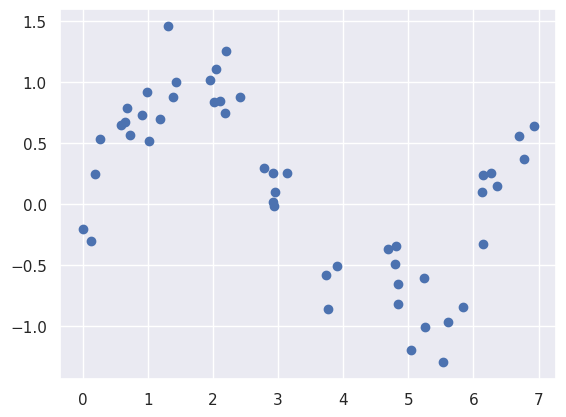

In [ ]:
sns.set(color_codes=True)
plt.scatter(x,y)
plt.show()

In [ ]:
model = sm.OLS(y,x).fit()

In [ ]:
y_pred = model.predict(x)

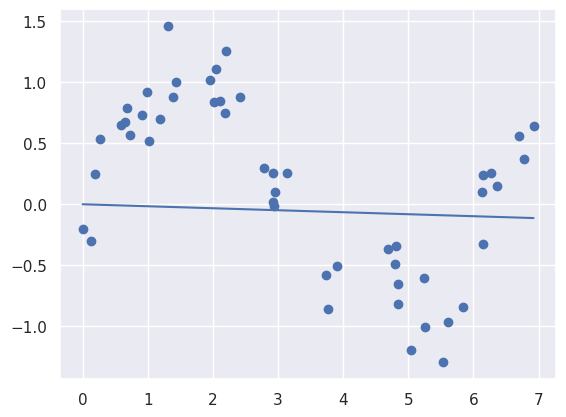

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_feat = PolynomialFeatures(degree = 5)
xp5 = poly_feat.fit_transform(x)
xp5.shape

(50, 6)

In [ ]:
model = sm.OLS(y, xp5).fit()
y_pred = model.predict(xp5)

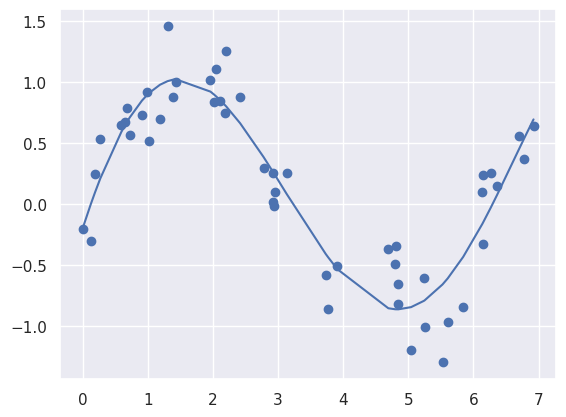

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_pred)
plt.show()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     52.38
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           2.01e-17
Time:                        10:37:45   Log-Likelihood:                -4.1724
No. Observations:                  50   AIC:                             20.34
Df Residuals:                      44   BIC:                             31.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2000      0.186     -1.078      0.2

In [ ]:
#Ridge Regression

In [ ]:
alphas = [.01, .1, 1, 10, 100, 1000, 10000]

In [ ]:
ridge = RidgeCV(alphas = alphas, cv = 5)
ridge_fit = ridge.fit(X_train, Y_train)

In [ ]:
yhat_ridge = ridge_fit.predict(X_test)

In [ ]:
error_metrics(Y_test, yhat_ridge)

('Mean Absolute Error: 873.3465042120688',
 'Mean Square Error: 2111651.653405792',
 'r2 score: 0.866344342706926')

In [ ]:
#common alpha for Lasso
alphas = [.01, .1, 1, 10, 100, 1000, 10000]

In [ ]:
lasso = LassoCV(cv = 5, random_state=32, alphas=alphas)

In [ ]:
lasso_fit = lasso.fit(X_train, Y_train)

In [ ]:
yhat_lasso = lasso_fit.predict(X_test)

In [ ]:
error_metrics(Y_test, yhat_lasso)

('Mean Absolute Error: 875.8501067074241',
 'Mean Square Error: 2112490.866497439',
 'r2 score: 0.8662912252444921')

In [ ]:
error_metrics(Y_test, yhat_ridge)

('Mean Absolute Error: 873.3465042120688',
 'Mean Square Error: 2111651.653405792',
 'r2 score: 0.866344342706926')

In [ ]:
lasso_ridge_comp = pd.DataFrame({"Actual":Y_test, "Pred Lasso": yhat_lasso, "Pred Ridge":yhat_ridge})

In [ ]:
lasso_ridge_comp["Diff"] = np.abs(lasso_ridge_comp["Pred Lasso"] - lasso_ridge_comp["Pred Ridge"])

In [ ]:
lasso_ridge_comp.describe()

,Actual,Pred Lasso,Pred Ridge,Diff
count,16180.000000,16180.000000,16180.000000,16180.000000
mean,3920.537268,3942.346911,3942.347434,10.194499
std,3974.942828,3707.684789,3710.777900,10.691663
min,337.000000,-2265.663534,-2353.991413,0.000829
25%,957.000000,939.700564,945.493813,4.145847
50%,2409.000000,2948.168228,2937.534443,7.987925
75%,5267.000000,5669.911847,5661.692686,12.710140
max,18823.000000,36176.275301,36354.560585,622.774880


In [ ]:
lasso_ridge_comp

,Actual,Pred Lasso,Pred Ridge,Diff
35677,910.0,1067.207713,1075.612870,8.405157
31078,752.0,778.864254,789.813044,10.948790
13719,603.0,579.568426,596.121266,16.552840
33759,840.0,752.163371,754.027815,1.864443
1468,2982.0,3269.053204,3264.534187,4.519017
...,...,...,...,...
44808,1624.0,1948.257753,1947.638804,0.618948
8239,4374.0,5541.750503,5534.593246,7.157257
46748,1800.0,1515.139850,1515.769671,0.629821
17159,6851.0,9646.745433,9650.537549,3.792115


In [ ]:
#ElasticNetCV

In [ ]:
#common alpha for Lasso
alphas = [.01, .1, 1, 10, 100, 1000, 10000]

In [ ]:
elasticnet = ElasticNetCV(cv = 5, random_state= 32, l1_ratio= 1, alphas=alphas)
elastic_fit = elasticnet.fit(X_train, Y_train)
yhat_elastic = elastic_fit.predict(X_test)

In [ ]:
error_metrics(Y_test, yhat_elastic)

('Mean Absolute Error: 875.8501067074241',
 'Mean Square Error: 2112490.866497439',
 'r2 score: 0.8662912252444921')

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, random_state= 32)

In [ ]:
rf_fit = rf.fit(X_train, Y_train)

In [ ]:
yhat_rf = rf_fit.predict(X_test)

In [ ]:
#1000
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 776.8355589341882',
 'Mean Square Error: 1857256.4977861657',
 'r2 score: 0.8824461233588984')

In [ ]:
#10
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 810.447438449478',
 'Mean Square Error: 2025796.6830159249',
 'r2 score: 0.8717784788158942')

In [ ]:
#50
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 783.0948965582821',
 'Mean Square Error: 1892408.2960193295',
 'r2 score: 0.8802212124980993')

In [ ]:
#100
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 779.3533954444723',
 'Mean Square Error: 1869789.7164825131',
 'r2 score: 0.8816528411998091')

In [ ]:
#Cross-validation

In [ ]:
#rename some things, makes our work more understandable and transferable
features = X_train.copy()
targets = Y_train.copy()

#defining models we want to compare
models = [
          LinearRegression(),
          RidgeCV(),
          LassoCV(),
          #ElasticNetCV(),
          RandomForestRegressor()
]

#number of cross validation, 5 is standard...lets go 10
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

#outer for loop to execute our cross validation on the above models
for model in models:
  #accessing model information class
  model_name = model.__class__.__name__
  #get our parameters of model to calculate R2
  accuracies = cross_val_score(model, features, targets, scoring="r2", cv=CV)
  #inner for loop to fill in the entries
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
#finalizing the dataframe
cv_df = pd.DataFrame(entries, columns=["model_name", 'fold_idx', 'r2'])

<ipython-input-103-be73e4db7fa5>:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x="model_name", y="r2", data=cv_df, size = 7, jitter=True, edgecolor="gray", linewidth=2)


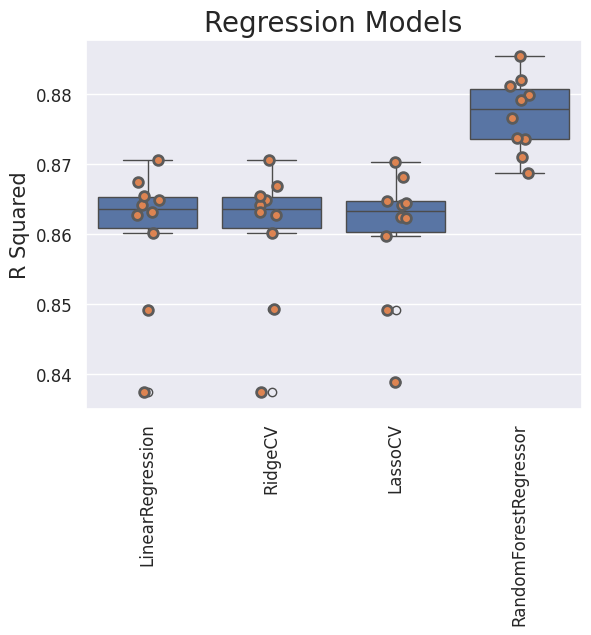

In [ ]:
sns.set(color_codes=True)
sns.boxplot(x="model_name", y="r2", data=cv_df)
sns.stripplot(x="model_name", y="r2", data=cv_df, size = 7, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Regression Models", fontsize=20)
plt.ylabel("R Squared", fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 12, rotation=90)
plt.yticks(fontsize = 12, rotation = 0)
plt.show()

In [ ]:
cv_df.head(5)

,model_name,fold_idx,r2
0,LinearRegression,0,0.837437
1,LinearRegression,1,0.867384
2,LinearRegression,2,0.864818
3,LinearRegression,3,0.864102
4,LinearRegression,4,0.870505


In [ ]:
final_comp = cv_df.groupby("model_name").r2.mean().reset_index().sort_values(by = "r2", ascending = False)
final_comp

,model_name,r2
2,RandomForestRegressor,0.877086
1,LinearRegression,0.860505
3,RidgeCV,0.860455
0,LassoCV,0.860444


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor = RandomForestRegressor(random_state=32)

In [ ]:
grid = {
    "n_estimators" : [20, 50, 100, 500],
    "criterion" : ["squared_error"]
}



In [ ]:
#time consuming
grid_apply = GridSearchCV(regressor, grid, scoring = "r2", cv = 5, refit = True, verbose = 2)

In [ ]:
#actual time consuming print out...but totally worth it!
grid_apply.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........criterion=squared_error, n_estimators=20; total time=   2.3s
[CV] END ...........criterion=squared_error, n_estimators=20; total time=   2.2s
[CV] END ...........criterion=squared_error, n_estimators=20; total time=   2.2s
[CV] END ...........criterion=squared_error, n_estimators=20; total time=   2.2s
[CV] END ...........criterion=squared_error, n_estimators=20; total time=   2.1s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   5.7s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   5.3s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   5.7s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   5.3s
[CV] END ...........criterion=squared_error, n_estimators=50; total time=   5.6s
[CV] END ..........criterion=squared_error, n_estimators=100; total time=  11.0s
[CV] END ..........criterion=squared_error, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=32),
             param_grid={'criterion': ['squared_error'],
                         'n_estimators': [20, 50, 100, 500]},
             scoring='r2', verbose=2)

In [ ]:
best_perf = grid_apply.best_score_

best_model = grid_apply.best_params_

In [ ]:
print("Best R Squared =" + " " +str(best_perf))
print(" ")
print("Best Parameters:"+ " " +str(best_model))

Best R Squared = 0.8779059179813906
 
Best Parameters: {'criterion': 'squared_error', 'n_estimators': 500}
